In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
train_images = np.loadtxt('data/train_images.txt') # incarcam imaginile
train_labels = np.array(np.loadtxt('data/train_labels.txt'), dtype=np.int) # incarcam etichetele

In [37]:
test_images = np.loadtxt('data/test_images.txt') # incarcam imaginile
test_labels = np.array(np.loadtxt('data/test_labels.txt'), dtype=np.int) # incarcam etichetele

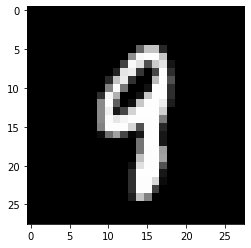

In [38]:
image = train_images[-1] # prima imagine # 784
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [39]:
bins = np.linspace(0, 256, num=5) 

In [40]:
print(bins)

[  0.  64. 128. 192. 256.]


In [41]:
np.digitize(np.array([[0, 255]]), bins)

array([[1, 4]], dtype=int64)

In [42]:
def values_to_bins(x, bins):
    return np.digitize(x, bins) - 1
    

In [43]:
bins = np.linspace(0, 256, num=5) 

In [44]:
train_images_bins = values_to_bins(train_images, bins)
test_images_bins = values_to_bins(test_images, bins)

In [45]:
train_images_bins.max()

3

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
naive_bayes_model = MultinomialNB()

In [48]:
naive_bayes_model.fit(train_images_bins, train_labels)

MultinomialNB()

In [49]:
predicted_labels = naive_bayes_model.predict(test_images_bins)

In [50]:
# acuratate
accuracy = np.mean(predicted_labels == test_labels)

In [51]:
print(accuracy)

0.836


In [52]:
accuracy_2 = naive_bayes_model.score(test_images_bins, test_labels)
print(accuracy_2)

0.836


In [53]:
for num_bins in [3, 5, 7, 9, 11]:
    bins = np.linspace(0, 256, num=num_bins) 
    train_images_bins = values_to_bins(train_images, bins)
    test_images_bins = values_to_bins(test_images, bins)
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(train_images_bins, train_labels)
    accuracy = naive_bayes_model.score(test_images_bins, test_labels)
    print('num bins = %d has accuracy %f' % (num_bins, accuracy))

num bins = 3 has accuracy 0.830000
num bins = 5 has accuracy 0.836000
num bins = 7 has accuracy 0.842000
num bins = 9 has accuracy 0.842000
num bins = 11 has accuracy 0.842000


In [54]:
bins = np.linspace(0, 256, num=11) 
train_images_bins = values_to_bins(train_images, bins)
test_images_bins = values_to_bins(test_images, bins)
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(train_images_bins, train_labels)
predicted_labels = naive_bayes_model.predict(test_images_bins)

In [55]:
misclassified_indices = np.where(test_labels != predicted_labels)[0]

In [56]:
misclassified_indices

array([  7,  13,  25,  33,  39,  42,  54,  63,  71,  75,  76,  80,  83,
       109, 111, 115, 118, 124, 128, 141, 146, 147, 149, 150, 164, 165,
       166, 171, 188, 191, 211, 213, 214, 215, 233, 235, 237, 241, 246,
       256, 260, 261, 262, 271, 274, 281, 283, 304, 306, 326, 331, 334,
       335, 336, 343, 354, 360, 365, 367, 372, 377, 384, 385, 386, 406,
       416, 423, 430, 433, 439, 443, 446, 448, 457, 463, 489, 492, 493,
       496], dtype=int64)

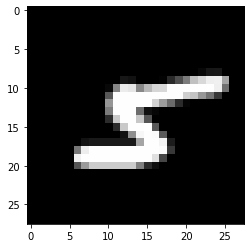

Predicted labels = 8, Correct label = 5


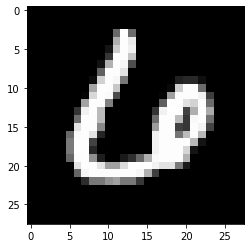

Predicted labels = 0, Correct label = 6


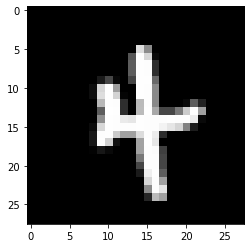

Predicted labels = 9, Correct label = 4


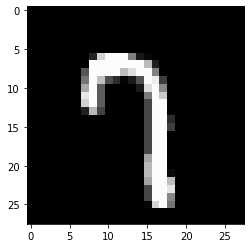

Predicted labels = 9, Correct label = 7


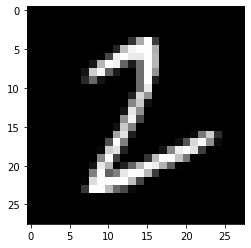

Predicted labels = 3, Correct label = 2


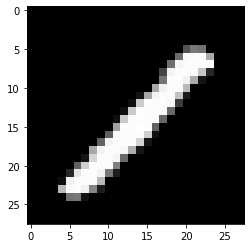

Predicted labels = 8, Correct label = 1


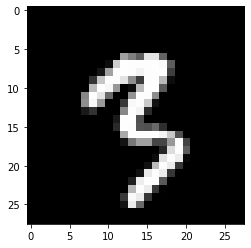

Predicted labels = 9, Correct label = 3


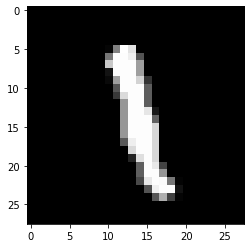

Predicted labels = 8, Correct label = 1


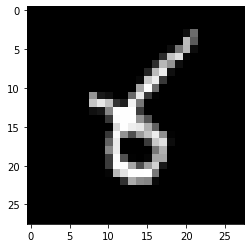

Predicted labels = 8, Correct label = 6


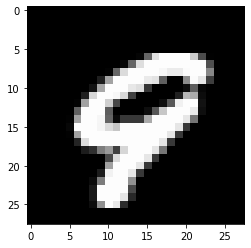

Predicted labels = 4, Correct label = 9


In [57]:
for idx in misclassified_indices[:10]:
    img = test_images[idx].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.show()
    print('Predicted labels = %d, Correct label = %d' % (predicted_labels[idx], test_labels[idx]))

In [58]:
def confunsion_matrix(predicted_labels, ground_truth_labels):
    num_labels = ground_truth_labels.max() + 1
    conf_mat = np.zeros((num_labels, num_labels))
    
    for i in range(len(predicted_labels)):
        conf_mat[ground_truth_labels[i], predicted_labels[i]] += 1
    return  conf_mat
    

In [59]:
conf_mat = confunsion_matrix(predicted_labels, test_labels)

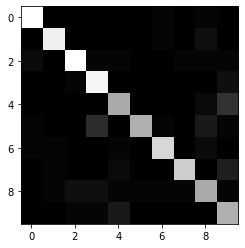

In [60]:
plt.imshow(conf_mat, cmap='gray')

In [61]:
print(conf_mat)

[[51.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0. 48.  0.  0.  0.  0.  1.  0.  3.  0.]
 [ 2.  0. 51.  1.  1.  0.  0.  1.  1.  1.]
 [ 0.  0.  1. 49.  0.  0.  0.  0.  0.  3.]
 [ 0.  0.  0.  0. 34.  0.  0.  0.  2. 10.]
 [ 1.  0.  0.  9.  0. 35.  1.  0.  5.  1.]
 [ 1.  1.  0.  0.  1.  0. 43.  0.  2.  0.]
 [ 0.  1.  0.  0.  2.  0.  0. 41.  0.  6.]
 [ 0.  1.  3.  3.  1.  1.  1.  1. 34.  1.]
 [ 0.  0.  1.  1.  5.  0.  0.  0.  0. 35.]]
